In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
result_baseline_mlp = pd.read_csv('n_evaluation_baseline_MLP.csv',usecols=['test_recall','test_f1','test_acc'])
result_baseline_cnn = pd.read_csv('n_evaluation_baseline_CNN.csv',usecols=['test_recall','test_f1','test_acc'])
result_entropy_mlp = pd.read_csv('n_evaluation_entropy_MLP.csv',usecols=['test_recall','test_f1','test_acc'])

In [45]:
result_baseline_mlp['test_f1'] = 2 * (result_baseline_mlp['test_recall'] * result_baseline_mlp['test_acc']) / (result_baseline_mlp['test_recall'] + result_baseline_mlp['test_acc'])
result_baseline_cnn['test_f1'] = 2 * (result_baseline_cnn['test_recall'] * result_baseline_cnn['test_acc']) / (result_baseline_cnn['test_recall'] + result_baseline_cnn['test_acc'])
result_entropy_mlp['test_f1'] = 2 * (result_entropy_mlp['test_recall'] * result_entropy_mlp['test_acc']) / (result_entropy_mlp['test_recall'] + result_entropy_mlp['test_acc'])

print('baseline_mlp',result_baseline_mlp.mean())
print('baseline_cnn',result_baseline_cnn.mean())
print('entropy_mlp',result_entropy_mlp.mean())

baseline_mlp test_recall    0.916768
test_f1        0.925380
test_acc       0.934239
dtype: float64
baseline_cnn test_recall    0.971429
test_f1        0.971343
test_acc       0.971320
dtype: float64
entropy_mlp test_recall    0.980845
test_f1        0.983698
test_acc       0.986584
dtype: float64


In [51]:
print('baseline_mlp',result_baseline_mlp.std())
print('baseline_cnn',result_baseline_cnn.std())
print('entropy_mlp',result_entropy_mlp.std())

baseline_mlp test_recall    0.012862
test_f1        0.007255
test_acc       0.003982
dtype: float64
baseline_cnn test_recall    0.011166
test_f1        0.006666
test_acc       0.005118
dtype: float64
entropy_mlp test_recall    0.009366
test_f1        0.008141
test_acc       0.007878
dtype: float64


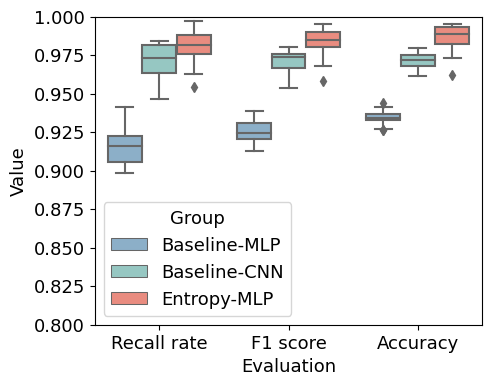

In [50]:
# result_baseline_mlp precessing
result_baseline_mlp_recall = pd.DataFrame(result_baseline_mlp['test_recall']).reset_index(drop=True)
result_baseline_mlp_recall.columns = ['value']
result_baseline_mlp_recall['evaluation'] = 'Recall rate'

result_baseline_mlp_f1 = pd.DataFrame(result_baseline_mlp['test_f1']).reset_index(drop=True)
result_baseline_mlp_f1.columns = ['value']
result_baseline_mlp_f1['evaluation'] = 'F1 score'

result_baseline_mlp_acc = pd.DataFrame(result_baseline_mlp['test_acc']).reset_index(drop=True)
result_baseline_mlp_acc.columns = ['value']
result_baseline_mlp_acc['evaluation'] = 'Accuracy'


result_baseline_mlp_all = pd.concat([result_baseline_mlp_recall,result_baseline_mlp_f1,result_baseline_mlp_acc],axis=0)
result_baseline_mlp_all['Group'] = 'Baseline-MLP'

# result_baseline_cnn processing
result_baseline_cnn_recall = pd.DataFrame(result_baseline_cnn['test_recall']).reset_index(drop=True)
result_baseline_cnn_recall.columns = ['value']
result_baseline_cnn_recall['evaluation'] = 'Recall rate'

result_baseline_cnn_f1 = pd.DataFrame(result_baseline_cnn['test_f1']).reset_index(drop=True)
result_baseline_cnn_f1.columns = ['value']
result_baseline_cnn_f1['evaluation'] = 'F1 score'

result_baseline_cnn_acc = pd.DataFrame(result_baseline_cnn['test_acc']).reset_index(drop=True)
result_baseline_cnn_acc.columns = ['value']
result_baseline_cnn_acc['evaluation'] = 'Accuracy'

result_baseline_cnn_all = pd.concat([result_baseline_cnn_recall,result_baseline_cnn_f1,result_baseline_cnn_acc],axis=0)
result_baseline_cnn_all['Group'] = 'Baseline-CNN'

# result_baseline_cnn processing
result_entropy_mlp_recall = pd.DataFrame(result_entropy_mlp['test_recall']).reset_index(drop=True)
result_entropy_mlp_recall.columns = ['value']
result_entropy_mlp_recall['evaluation'] = 'Recall rate'

result_entropy_mlp_f1 = pd.DataFrame(result_entropy_mlp['test_f1']).reset_index(drop=True)
result_entropy_mlp_f1.columns = ['value']
result_entropy_mlp_f1['evaluation'] = 'F1 score'

result_entropy_mlp_acc = pd.DataFrame(result_entropy_mlp['test_acc']).reset_index(drop=True)
result_entropy_mlp_acc.columns = ['value']
result_entropy_mlp_acc['evaluation'] = 'Accuracy'

result_entropy_mlp_all = pd.concat([result_entropy_mlp_recall,result_entropy_mlp_f1,result_entropy_mlp_acc],axis=0)
result_entropy_mlp_all['Group'] = 'Entropy-MLP'

result_all = pd.concat([result_baseline_mlp_all,result_baseline_cnn_all,result_entropy_mlp_all],axis=0)

my_colors = ["#82B0D2", "#8ECFC9","#FA7F6F"]
  
# add color array to set_palette
# function of seaborn
sns.set_palette( my_colors )
  
# make boxplot

# plt.figure(figsize=(8,5))
plt.figure(figsize=(5,4))
myfig = plt.gcf()
ax = sns.boxplot(x="evaluation", y="value", hue="Group",data=result_all)
plt.ylim(0.8,1)
plt.ylabel('Value')
plt.xlabel('Evaluation')
plt.rcParams.update({'font.size': 13})
# ax.legend_.remove()
myfig.savefig('plot_result_all.png', bbox_inches="tight", dpi=700)

In [49]:
result_all.head()

,value,evaluation,Group
0,0.916972,Recall rate,Baseline-MLP
1,0.923077,Recall rate,Baseline-MLP
2,0.935287,Recall rate,Baseline-MLP
3,0.907204,Recall rate,Baseline-MLP
4,0.932845,Recall rate,Baseline-MLP
